In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset and first insight

In [3]:
# import dataset 
df = pd.read_csv('_https://raw.githubusercontent.com/jigsaw1313/data-analysis/master/covid-19%20(small%20%26%20easy%20dataset)/__%20004%20Covid-19-data.csv')

# check datafram
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [4]:
# check columns and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


In [6]:
# check values of each columns
df.count()

# there are NaN values on State column

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [8]:
# check sum of NaN values of each column
df.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

# Analyze Dataframe

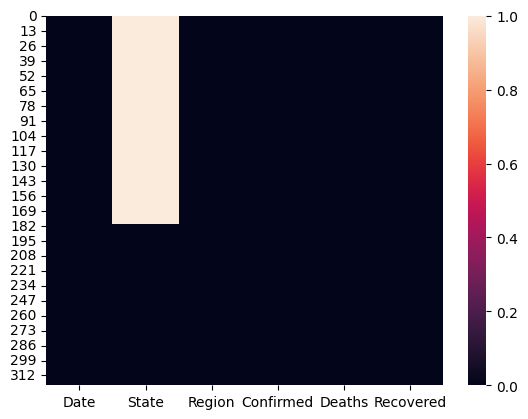

In [10]:
# check the heatmap of missing values
sns.heatmap(df.isnull())
plt.show()

### Check the number of Confirmed, Deaths and Recovered cases in each Region

In [12]:
df.groupby('Region').sum()

,Date,State,Confirmed,Deaths,Recovered
Region,,,,,
Afghanistan,4/29/2020,0,1939,60,252
Albania,4/29/2020,0,766,30,455
Algeria,4/29/2020,0,3848,444,1702
Andorra,4/29/2020,0,743,42,423
Angola,4/29/2020,0,27,2,7
...,...,...,...,...,...
West Bank and Gaza,4/29/2020,0,344,2,71
Western Sahara,4/29/2020,0,6,0,5
Yemen,4/29/2020,0,6,0,1


In [15]:
# check first 20 region
df.groupby('Region').sum().head(20)

,Date,State,Confirmed,Deaths,Recovered
Region,,,,,
Afghanistan,4/29/2020,0,1939,60,252
Albania,4/29/2020,0,766,30,455
Algeria,4/29/2020,0,3848,444,1702
Andorra,4/29/2020,0,743,42,423
Angola,4/29/2020,0,27,2,7
Antigua and Barbuda,4/29/2020,0,24,3,11
Argentina,4/29/2020,0,4285,214,1192
Armenia,4/29/2020,0,1932,30,900
Australia,4/29/20204/29/20204/29/20204/29/20204/29/20204...,Australian Capital TerritoryNew South WalesNor...,6752,91,5715


In [19]:
# check only Confirmed values
df.groupby('Region')['Confirmed'].sum().to_frame()

,Confirmed
Region,
Afghanistan,1939
Albania,766
Algeria,3848
Andorra,743
Angola,27
...,...
West Bank and Gaza,344
Western Sahara,6
Yemen,6


In [21]:
# sort by number of Confirmed
df.groupby('Region')['Confirmed'].sum().sort_values(ascending = False).to_frame()

,Confirmed
Region,
US,1039909
Spain,236899
Italy,203591
France,166543
UK,166441
...,...
Sao Tome and Principe,8
Papua New Guinea,8
Bhutan,7


In [26]:
# check only Confirmed & Recovered values
df.groupby('Region')[['Confirmed', 'Recovered']].sum()

,Confirmed,Recovered
Region,,
Afghanistan,1939,252
Albania,766,455
Algeria,3848,1702
Andorra,743,423
Angola,27,7
...,...,...
West Bank and Gaza,344,71
Western Sahara,6,5
Yemen,6,1


### Removing all the records where Confired Cases is less than 10

In [27]:
# check df
df.head(3)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702


In [30]:
# filter df by number of Confirmed cases
df[(df['Confirmed'] < 10)]

,Date,State,Region,Confirmed,Deaths,Recovered
18,4/29/2020,NaN,Bhutan,7,0,5
98,4/29/2020,NaN,MS Zaandam,9,2,0
105,4/29/2020,NaN,Mauritania,8,1,6
126,4/29/2020,NaN,Papua New Guinea,8,0,0
140,4/29/2020,NaN,Sao Tome and Principe,8,0,4
177,4/29/2020,NaN,Western Sahara,6,0,5
178,4/29/2020,NaN,Yemen,6,0,1
184,4/29/2020,Anguilla,UK,3,0,3
192,4/29/2020,"Bonaire, Sint Eustatius and Saba",Netherlands,5,0,0
194,4/29/2020,British Virgin Islands,UK,6,1,3


In [33]:
# remove confirmed cases where number is less than 10
df = df[~(df['Confirmed'] < 10)]

# check df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       304 non-null    object
 1   State      130 non-null    object
 2   Region     304 non-null    object
 3   Confirmed  304 non-null    int64 
 4   Deaths     304 non-null    int64 
 5   Recovered  304 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 16.6+ KB


In [35]:
# check and confirme df to be sure that Confirmed cases less than 10 are removed
df['Confirmed'].sort_values(ascending = True).to_frame()

,Confirmed
156,10
70,10
59,10
318,11
217,11
...,...
57,165093
168,165221
80,203591
153,236899


### In which Region, maximum number of Confimred cases were recorded

In [36]:
df.head(3)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702


In [37]:
df.groupby('Region')['Confirmed'].sum().sort_values(ascending = False).head(20)

Region
US                1039909
Spain              236899
Italy              203591
France             166536
UK                 166432
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82861
Brazil              79685
Canada              52860
Belgium             47859
Netherlands         38993
Peru                33931
India               33062
Switzerland         29407
Ecuador             24675
Portugal            24505
Saudi Arabia        21402
Name: Confirmed, dtype: int64

### in Which Region Minimum of Deaths cases were recorded

In [41]:
df.groupby('Region')['Deaths'].sum().sort_values(ascending = True).head(30)

Region
Cambodia                            0
Seychelles                          0
Saint Lucia                         0
Central African Republic            0
Saint Kitts and Nevis               0
South Sudan                         0
Rwanda                              0
Grenada                             0
Macau                               0
Madagascar                          0
Nepal                               0
Namibia                             0
Saint Vincent and the Grenadines    0
Mozambique                          0
Holy See                            0
Timor-Leste                         0
Mongolia                            0
Uganda                              0
Laos                                0
Eritrea                             0
Vietnam                             0
Fiji                                0
Dominica                            0
Gambia                              1
Equatorial Guinea                   1
Eswatini                            1
Cabo 

### Number of Confirmed, Deaths & Recovered were reported from US & Iran

In [42]:
# filter country
df[(df['Region'] == 'US')]

,Date,State,Region,Confirmed,Deaths,Recovered
181,4/29/2020,Alabama,US,6912,256,0
182,4/29/2020,Alaska,US,355,9,0
186,4/29/2020,Arizona,US,7209,308,0
187,4/29/2020,Arkansas,US,3193,57,0
195,4/29/2020,California,US,48747,1946,0
199,4/29/2020,Colorado,US,14758,766,0
200,4/29/2020,Connecticut,US,26767,2169,0
202,4/29/2020,Delaware,US,4655,144,0
204,4/29/2020,Diamond Princess cruise ship,US,49,0,0
205,4/29/2020,District of Columbia,US,4106,205,0


In [44]:
# Another example of Filtering by country
df[(df['Region'] == 'Iran')]

,Date,State,Region,Confirmed,Deaths,Recovered
76,4/29/2020,NaN,Iran,93657,5957,73791


### Sort df by Confirmed cases in ascending order

In [45]:
df.sort_values(by = 'Confirmed', ascending = True)

,Date,State,Region,Confirmed,Deaths,Recovered
156,4/29/2020,NaN,Suriname,10,1,8
70,4/29/2020,NaN,Holy See,10,0,2
59,4/29/2020,NaN,Gambia,10,1,8
318,4/29/2020,Yukon,Canada,11,0,0
217,4/29/2020,Greenland,Denmark,11,0,11
...,...,...,...,...,...,...
57,4/29/2020,NaN,France,165093,24087,48228
168,4/29/2020,NaN,UK,165221,26097,0
80,4/29/2020,NaN,Italy,203591,27682,71252
153,4/29/2020,NaN,Spain,236899,24275,132929


### Sort df by Recovered cases in descending order

In [46]:
df.sort_values(by = 'Recovered', ascending=False)

,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,NaN,Spain,236899,24275,132929
61,4/29/2020,NaN,Germany,161539,6467,120400
76,4/29/2020,NaN,Iran,93657,5957,73791
80,4/29/2020,NaN,Italy,203591,27682,71252
229,4/29/2020,Hubei,Mainland China,68128,4512,63616
...,...,...,...,...,...,...
258,4/29/2020,Nevada,US,4934,230,0
257,4/29/2020,Nebraska,US,3851,56,0
255,4/29/2020,Montana,US,451,16,0
254,4/29/2020,Missouri,US,7660,338,0
